# DV Laboratory Part B - Exercise 2

### In a solar panel efficiency study, researchers want to investigate the relationship between the temperature and the efficiency of solar panels. They collected data on the temperature (in Celsius) and the corresponding efficiency (in percentage) of solar panels over a period of time. The dataset contains measurements from 50 different days.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
df = pd.read_csv('solar_efficiency_temp.csv')
df.head()

,temperature,efficiency
0,27.440675,65.188987
1,35.759468,87.633611
2,30.138169,72.520823
3,27.244159,71.431708
4,21.182740,64.327393


In [23]:
X = df[['temperature']]
Y = df['efficiency']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
model = LinearRegression()
m = model.fit(X_train, Y_train)

Text(0, 0.5, 'Efficiency')

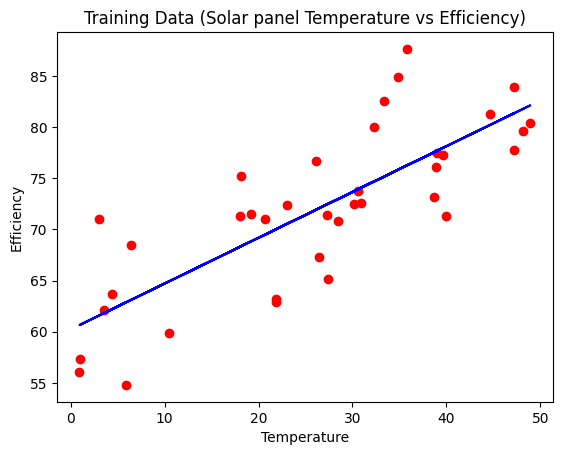

In [24]:
plt.scatter(X_train, Y_train, marker="o", color="red")
plt.plot(X_train, m.predict(X_train), color="blue")
plt.title('Training Data (Solar panel Temperature vs Efficiency)')
plt.xlabel('Temperature')
plt.ylabel('Efficiency')

Text(0, 0.5, 'Efficiency')

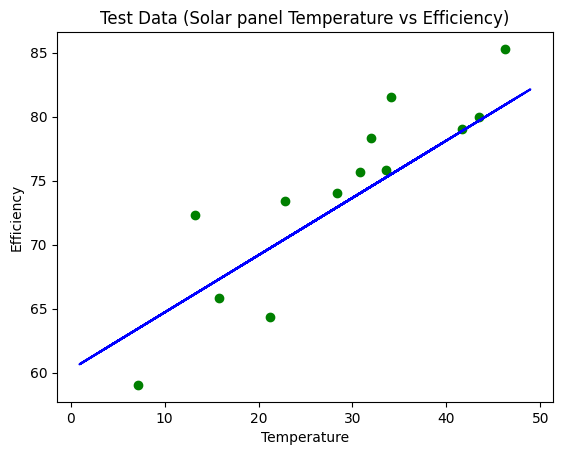

In [25]:
plt.scatter(X_test, Y_test, marker="o", color="green")
plt.plot(X_train, m.predict(X_train), color="blue")
plt.title('Test Data (Solar panel Temperature vs Efficiency)')
plt.xlabel('Temperature')
plt.ylabel('Efficiency')

a. Using Simple Linear Regression, can you develop a model to predict the efficiency
of solar panels based on the temperature?

In [26]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

In [27]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 13.184913541739215
Mean Absolute Error: 2.947701592379695


b. Perform an F-test to determine whether temperature significantly predicts the efficiency of solar panels.
c. Conduct a t-test to assess the significance of the regression coefficient for temperature.

In [28]:
import statsmodels.api as sm
import pandas as pd

X = df[['temperature']]
Y = df['efficiency']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()


In [29]:
f_stat = model.fvalue
f_p_value = model.f_pvalue

t_stat = model.tvalues['temperature']
t_p_value = model.pvalues['temperature']

print(f"F-statistic: {f_stat:.2f}")
print(f"t-statistic for temperature: {t_stat:.2f}")


F-statistic: 91.59
t-statistic for temperature: 9.57
